# **Gradient Descent**
Gradient descent is an optimization algorithm used to minimize the cost function of a machine learning model. The cost function represents the difference between the predicted output of the model and the actual output. The goal of gradient descent is to find the optimal set of parameters that minimize the cost function.


There are several types of gradient descent algorithms, including:
- Batch gradient descent: This algorithm updates the parameters after processing the entire training dataset.
- Stochastic gradient descent: This algorithm updates the parameters after processing a single training example.
- Mini-batch gradient descent: This algorithm updates the parameters after processing a small batch of training examples.

**Why to use Gradient Descent as we have Ordinary Least Square Foumula for both coef_ and Intercept_ directly ?**
- Ordinary Least Square technique is computionally very complex for higher dimentions, in that cases we use Gradient Descent


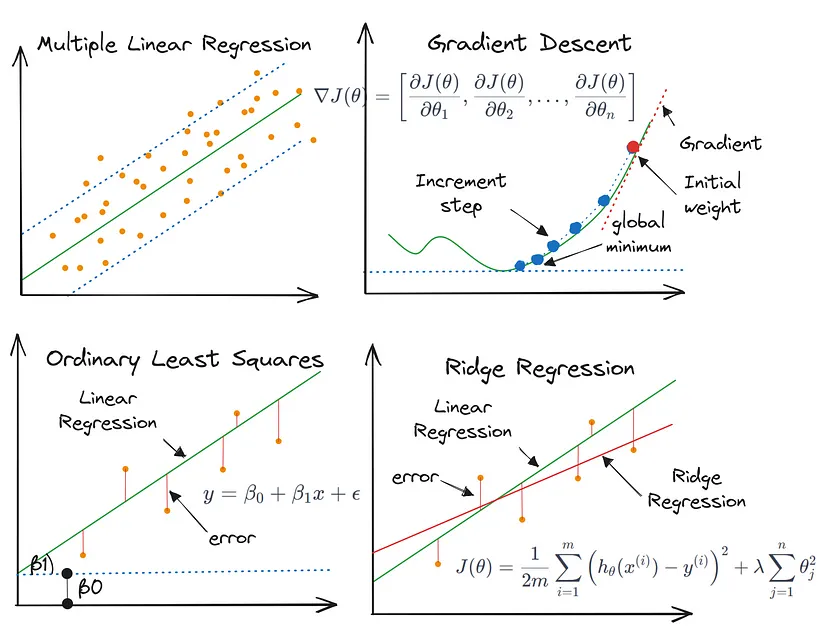

## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
X,y = make_regression(n_samples=5, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=42)

## Behavour of coefficients  - Visualization
How Coeffieients converges towards its optimal solution with minimizing loss function

In [3]:
def gradient_descent(X, y, epochs, learning_rate):
    coef_, intercept_ = 1, 0 # Generally, this values are considered as random values of m and b
    
    loss = []
    coef_list = [[1]]
    intercept_list = [0]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x = X.ravel(), y = y, mode = 'markers', name = 'Data Points'))
    
    for i in range(epochs):
        y_hat = coef_ * X.ravel() + intercept_
        
        loss_value = np.sum((y - y_hat)**2)
        loss.append(loss_value)

        # Calculating Slope of intercept
        intercept_der = -2 * np.mean(y - y_hat)
        intercept_ = intercept_ - learning_rate * intercept_der
        intercept_list.append(intercept_)
        
        # Calculating Slope of coef_
        coef_der = -2 * np.dot((y - y_hat), X)
        coef_ = coef_ - learning_rate * coef_der
        coef_list.append(coef_)

        fig.add_trace(go.Scatter(x = X.ravel(), y = coef_ * X.ravel() + intercept_, mode = 'lines', name = f'BFL - {i+1}st iter'))
    fig.update_xaxes(title="input")
    fig.update_yaxes(title="output")
    fig.update_layout(title="Behavour of coefficients - Visualization")
    fig.show()
    
    return loss, intercept_list, coef_list 
    
loss, intercept_list, coef_list = gradient_descent(X, y, 10, 0.01) 

## Effect of No. Epochs
- The number of epochs is a hyperparameter that controls how many times the model will pass through the entire training set.
- Common choices: 1000, 5000, or 10,000, but it depends on the complexity of the problem. Start with 1000 and increase if necessary.
- Too few epochs might result in underfitting, while too many might cause overfitting.

## Effect of Learning_rate
- The learning rate determines the step size during gradient updates.
- Common choices: 0.01, 0.1, 0.001, etc.
- A learning rate that is too high might cause divergence, while a learning rate that is too low might lead to very slow convergence.

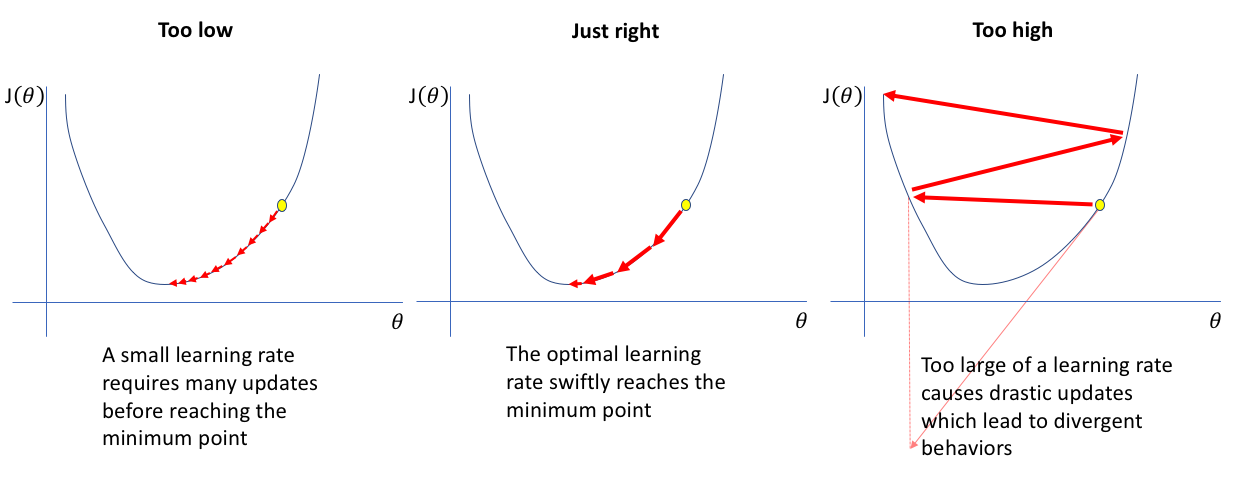

In [4]:
# For Optimal Learning rate
fig = make_subplots(
    rows=1,
    cols=2, 
    subplot_titles=("coef vs cost", "intercept vs cost")
)

fig.add_trace(go.Scatter(x = np.array(coef_list).ravel(), y = loss, mode = 'lines'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = intercept_list, y = loss, mode = 'lines'), row = 1, col = 2)
fig.update_xaxes(title="input")
fig.update_yaxes(title="output")
fig.show()

# **Batch Gradient Descent**
Batch gradient descent computes the gradient of the cost function with respect to the model parameters using the entire training dataset in each iteration. Stochastic gradient descent, on the other hand, computes the gradient using only a single training example or a small subset of examples in each iteration.

In [6]:
dataframe = load_diabetes(as_frame = True)
df = dataframe['data']
df['target'] = dataframe['target']
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## sklearn inbuilt class 

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]] [151.34560454]


In [8]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4526027629719195

## Creatin batch_gradient_descent class - nD

In [9]:
coef_list = []
intercept_list = []
loss = []

class batch_gradient_descent:
    def __init__(self, learning_rate = 0.0001, epochs = 100) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train) -> None:
        X_train = np.insert(X_train, 0, 1, axis = 1)
        y_train = np.array(y_train).ravel()
        
        beta = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(X_train, beta)
            
            loss.append(np.sum((y_train - y_hat) ** 2))
            
            beta_der = -2 * np.dot(y_train - y_hat, X_train)
            beta = beta - self.lr * beta_der
            
            coef_list.append(beta[1:])
            intercept_list.append(beta[0])
        
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [10]:
bgd = batch_gradient_descent(0.001, 1000)
bgd.fit(X_train, y_train)

## Slope and Intercept

In [11]:
print(bgd.intercept_, bgd.coef_)

151.47836073838656 [  46.89139107 -169.40550196  469.51877893  307.08946236  -50.8393379
  -98.79531632 -209.16133848  146.06817032  350.69317221  131.66039922]


## Model Prediction and r2_score
- r2_score is improved from 0.429 to 0.459

In [12]:
y_pred = bgd.predict(X_test)
r2_score(y_test, y_pred)

0.4591365054390685

## Comparison between each Coefficient with Loss value

In [13]:
coef_df = pd.DataFrame(coef_list)

fig = make_subplots(
    rows=3,
    cols=3, 
    subplot_titles=("age vs loss", "sex vs loss", "bmi vs loss", "bp vs loss", "s1 vs loss", "s2 vs loss", "s3 vs loss", "s4 vs loss", "s5 vs loss", "s6 vs loss")
)
for row in range(3):
    for col in range(3):
        fig.add_trace(go.Scatter(x = np.array(coef_df.iloc[:, (row + col)]).ravel(), y = loss, mode = 'lines'), row = row + 1, col = col + 1)

fig.update_layout(
    title_text="Comparison between each Coefficient with Loss value",
    showlegend=False, 
    height=1000,  
    width=1000,   
    margin=dict(t=100, b=100, l=100, r=100)
)
fig.show()

# **Stocastic Gradient Descent**
Insteed of updating coef_ and intercept_ after one entire epoch, it get changed after each random row in the dataset, so for each epoch no.of rows times the coef_ and intercept_ get updated.
- High computational efficiency due to the fact that the gradient can be estimated with a random sample of data points instead of requiring the full dataset
- Ability to process large datasets and reach convergence quickly
- Effective and popular optimization algorithm for machine learning

## Learning Schedule
A learning schedule adjusts the learning rate over time to improve the training process. The learning rate is crucial for gradient descent algorithms, as it controls the size of the steps taken towards the minimum of the loss function.

In [14]:
class stocastic_gradient_descent:
    def __init__(self, learning_rate=0.01, epochs=1000) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate  # Initial learning rate
        self.epochs = epochs  # Number of iterations
    
    # Learning Schedule
    def learning_rate(self, t):
        t0, t1 = 5, 50
        return t0 / (t + t1)
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        
        # Add bias term (column of ones) to X_train
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        # Initialize random values for coef and intercept
        beta = np.ones(X_train.shape[1])
        
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                # Random index generator
                idx = np.random.randint(0, X_train.shape[0])
                
                # Setting Learning rate
                lr = self.learning_rate(epoch * X_train.shape[0] + i)
                
                # Compute the prediction
                y_hat = np.dot(X_train[idx], beta)
                
                # Compute the gradient
                gradient = -2 * (y_train[idx] - y_hat) * X_train[idx]
                
                # Update beta (including the intercept term)
                beta -= lr * gradient
        
        # Extract the intercept and coefficients
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        return self.intercept_ + np.dot(X_test, self.coef_)

## Model Training

In [15]:
sgd = stocastic_gradient_descent(0.01, 1000)
sgd.fit(X_train, y_train)

## Coef_ and Intercept_

In [16]:
print(sgd.coef_, sgd.intercept_, sep = '\n')

[ 36.9850401  -15.04442552 162.48344047 114.23001     29.73932817
  20.91217293 -94.18221757  94.06762043 135.28146908  95.51890165]
153.05751230875342


## Model Prediction and r2_score

In [17]:
y_pred = sgd.predict(X_test)
r2_score(y_test, y_pred)

0.3253034206629202

# **SGDRegressor - sklearn class**

Hyoerparameters:

- loss: The loss function to be used. The possible values are ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’

- penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’ he penalty (aka regularization term) to be used. Defaults to ‘l2’ 

- alpha: if regularization is applied 

- l1_ratio: float, default=0.15 The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’. Values must be in the range [0.0, 1.0]

- shuffle: Whether or not the training data should be shuffled after each epoch.

- verbose: int, default=0
The verbosity level. Values must be in the range [0, inf).

- eta0: float, default=0.01
The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.

- early_stopping: bool, default=False
Whether to use early stopping to terminate training when validation score is not improving.

- warm_start: bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

- average: bool or int, default=False
When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [25]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    max_iter=50000,
    eta0=0.001,
    random_state=42,
)

In [26]:
model.fit(X_train, np.array(y_train).ravel())
print(model.coef_, model.intercept_)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

[  57.02421101  -93.11179386  363.27937547  250.29039898   -1.61675683
  -38.65529093 -182.23991226  147.89939093  285.86711708  147.37030779] [151.85363836]


c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.4474552590723856

# **Mini Batch Gradient Descent**
Mini-batch gradient descent is a type of stochastic gradient descent that uses a small subset of the training dataset, known as a mini-batch, to update the model’s parameters. This approach combines the advantages of batch gradient descent and stochastic gradient descent.

## Steps
- Divide the training dataset into smaller subsets, known as mini-batches.
- Compute the gradient of the cost function with respect to the model’s parameters for each mini-batch.
- Update the model’s parameters using the average gradient over the mini-batch.
- The main advantages of mini-batch gradient descent are:

## Advantages
- It is more efficient than batch gradient descent, as it only requires computing the gradient for a small subset of the training data.
- It is more robust than stochastic gradient descent, as it reduces the noise associated with updating the model’s parameters based on a single data point.
- It can trade off convergence speed and computation efficiency, making it a more flexible and robust algorithm.

In [18]:
class gradient_descent:
    def __init__(self, batch_size, learning_rate, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()
        
        X_train = np.insert(X_train, 0, 1, axis = 1)

        # Initilizing random values of coef and intercept, generally
        beta = np.ones(X_train.shape[1])

        for i in range(self.epochs): 
            # batch wise looping
            for j in range(int(X_train.shape[0]/self.batch_size)):
                # Generating random set of indices
                idx = random.sample(range(X_train.shape[0]), self.batch_size)

                # Using fancy indexing
                y_hat = np.dot(X_train[idx], beta)

                beta_der = (-2 / X_train.shape[0]) * np.dot(y_train[idx] - y_hat, X_train[idx])
                beta = beta - (self.lr * beta_der)
        
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

## Model Training

In [19]:
mbgd = gradient_descent(100, 0.01, 10000)

In [20]:
mbgd.fit(X_train, y_train)

## Coef_ and Intercept_

In [21]:
mbgd.intercept_

151.99881964134326

In [22]:
mbgd.coef_

array([  55.09480122,  -34.06822867,  244.72353937,  175.88408891,
         31.61854959,    9.08259425, -135.15413616,  129.60773247,
        205.79792033,  127.46709984])

## Model Prediction and r2_score
- Hyperparameter tuning is require in order to increase the accuracy

In [23]:
y_pred = mbgd.predict(X_test)
r2_score(y_test, y_pred)

0.4028844175656393

## Behavour of Types of Gradient Descent

Batch Gradient Descent
- Computational Cost: High, as it processes the entire dataset.
- Convergence: Slow, because it may take many epochs to see meaningful changes.
- Stability: Stable, with consistent updates.
- Use Case: Suitable for smaller datasets or when high computational resources are available.


Stocastic Gradient Descent
- Computational Cost: Low, since it updates weights after each sample.
- Convergence: Fast, but with high variance; might not always converge to the best solution.
- Stability: Less stable; the path to the optimal solution can be noisy.
- Use Case: Best for online learning or very large datasets where the full dataset can't fit into memory.

Mini Batch Gradient Descent
- Computational Cost: Moderate; processes subsets of data.
- Convergence: Balanced speed; combines benefits of Batch and SGD.
- Stability: More stable than SGD but less stable than Batch Gradient Descent.
- Use Case: Commonly used for large datasets where a balance of speed and accuracy is needed.


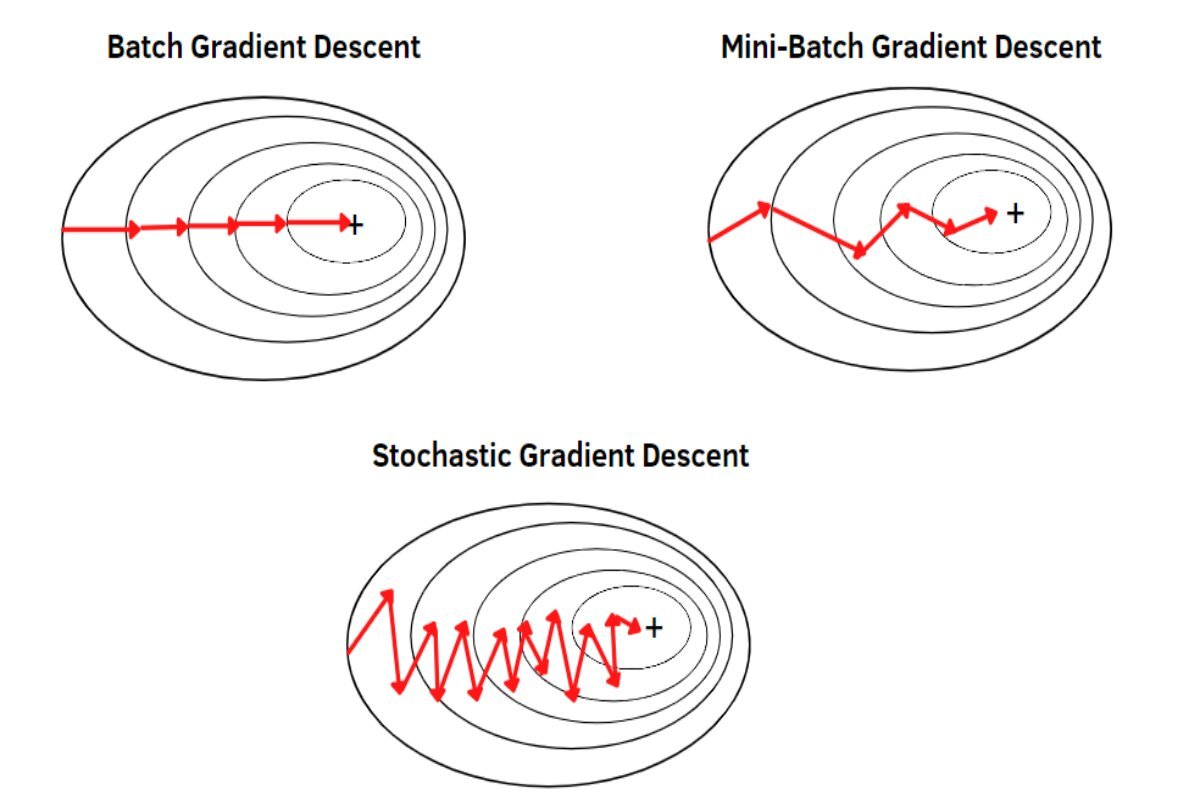